In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor # Stochastic Gradient Descent Regressor
from sklearn.preprocessing import StandardScaler#scales features using mtds learnt in previous labs

np.set_printoptions(precision=2)


In [5]:
data = np.loadtxt("./data/houses.txt", delimiter=',', skiprows=1)
X_train = data[:,:4]
y_train = data[:,4]
X_features = ['size(sqft)','bedrooms','floors','age']


In [6]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)#scale features
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.85 6.14 2.06 3.69]


In [7]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)


SGDRegressor()

In [14]:
b = sgdr.intercept_
w = sgdr.coef_

In [18]:
y_pred= sgdr.predict(X_norm)


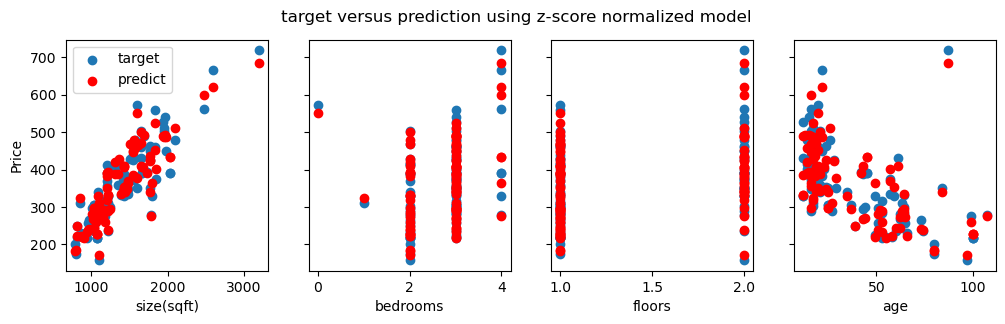

In [19]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color='r', label = 'predict')
ax[0].set_ylabel("Price")
ax[0].legend()
fig.suptitle("TARGET VS PREDICTION")
plt.show()